# Cijene automobila na SAD tržištu


### Uvod
Uzeli smo podatke o cijenama automobila na SAD-ovom tržištu. Željeli smo saznati što utječe na cijenu automobila. Kada smo saznali što točno utječe na cijenu, želimo onda vidjeti je li moguće predvidjeti cijene u budućnosti.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Prvi korak : Priprema podataka

In [ ]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.shape

(205, 26)

In [ ]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Korak 2 : Čišćenje podataka

In [ ]:
#Odvajanje naziva tvrtke iz stupca CarName
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Popravljanje krivo napisanih kompanija

     `maxda` = `mazda`
     `Nissan` = `nissan`
     `porsche` = `porcshce`
     `toyota` = `toyouta`
     `vokswagen` = `volkswagen` =  `vw`

In [ ]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
#Provjera duplikata
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [ ]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Korak 3: Vizualizacija podataka


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


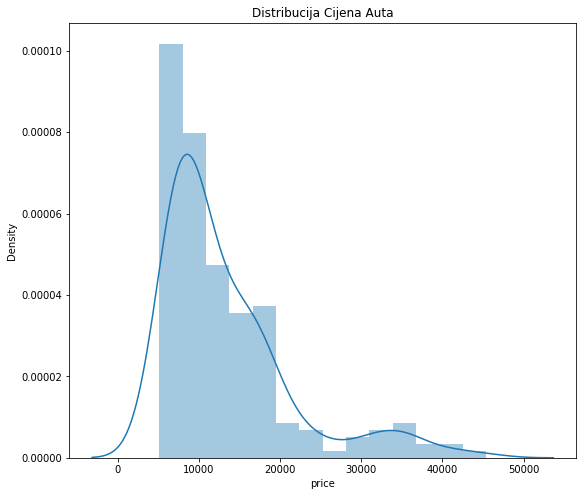

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribucija Cijena Auta')
sns.distplot(cars.price)

plt.show()

In [ ]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


#### Zaključak :

1. Čini se da je grafikon nagnut udesno, što znači da je većina cijena u skupu podataka niska(Ispod 15,000$).
2. Postoji značajna razlika između srednje vrijednosti i medijana distribucije cijena.
3. Podatkovne točke daleko su odmaknute od prosjeka, što ukazuje na veliku varijaciju u cijenama automobila.(85% cijena je ispod 18.500, dok je preostalih 15% između 18.500 i 45.400.)

#### Korak 3.1: Vizualizacija kategoričkih podataka

    - CompanyName
    - Symboling
    - fueltype
    - enginetype
    - carbody
    - doornumber
    - enginelocation
    - fuelsystem
    - cylindernumber
    - aspiration
    - drivewheel

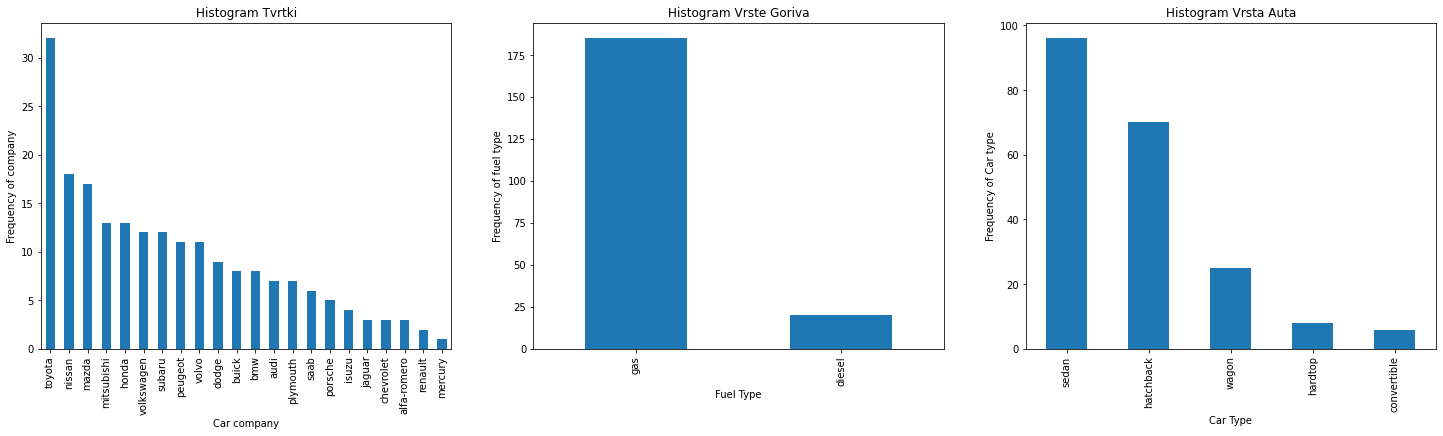

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind ='bar')
plt.title('Histogram Tvrtki')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind = 'bar')
plt.title('Histogram Vrste Goriva')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind ='bar')
plt.title('Histogram Vrsta Auta')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

#### Zaključak :

1. `Toyota` je omiljena automobilska tvrtka.
2.  Ima puno više automobila na benzin nego na dizel.
3. `sedan` je omiljen tip auta.

<Figure size 1800x432 with 0 Axes>

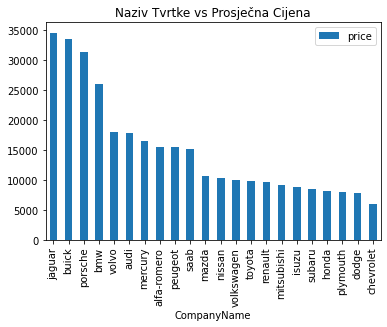

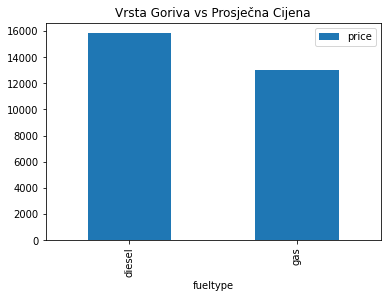

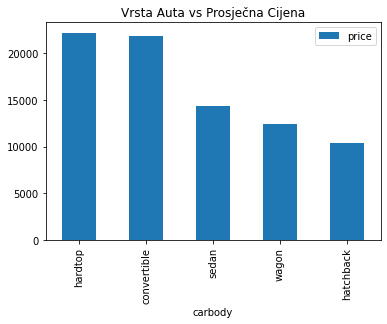

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Naziv Tvrtke vs Prosječna Cijena')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Vrsta Goriva vs Prosječna Cijena')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Vrsta Auta vs Prosječna Cijena')
plt.show()

#### Zaključak :

1. `Jaguar` i `Buick` imaju najveće prosječne cijene automobila.
2.  Diesel ima prosječnu veću cijenu nego benzin.
3. `hardtop` i `convertible` imaju prosječne veće cijene.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


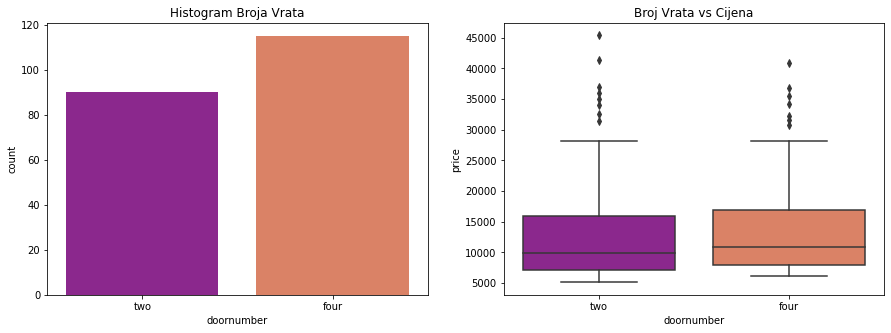

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


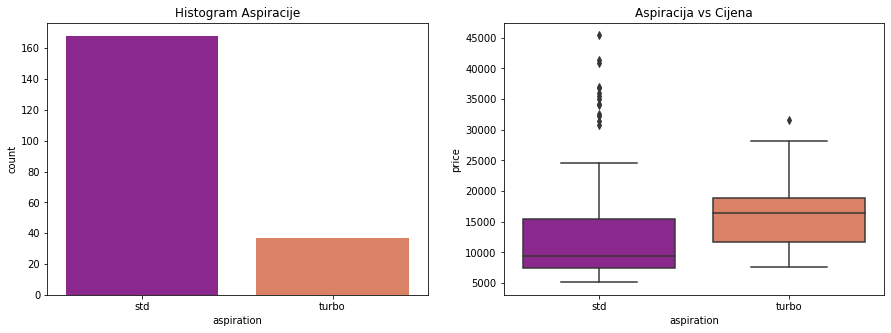

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


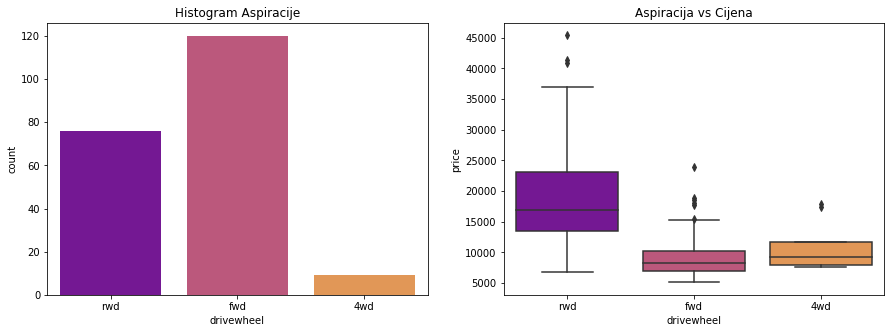

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Histogram Broja Vrata')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Broj Vrata vs Cijena')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Histogram Aspiracije')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiracija vs Cijena')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Histogram Aspiracije')
sns.countplot(cars.drivewheel, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiracija vs Cijena')
sns.boxplot(x=cars.drivewheel, y=cars.price, palette=("plasma"))

plt.show()


#### Zaključak :

1. `doornumber` varijabla ne utječe puno na cijenu. U njemu nema bitne razlike između kategorija.
2. Čini se da aspiracija `turbo` ima viši raspon cijena od `std`
3. Vrlo značajna razlika u kategoriji pogonskih kotača. Čini se da većina automobila visokog ranga preferira `rwd` pogon.

#### Step 3.2 : Vizualizacija numeričkih podataka

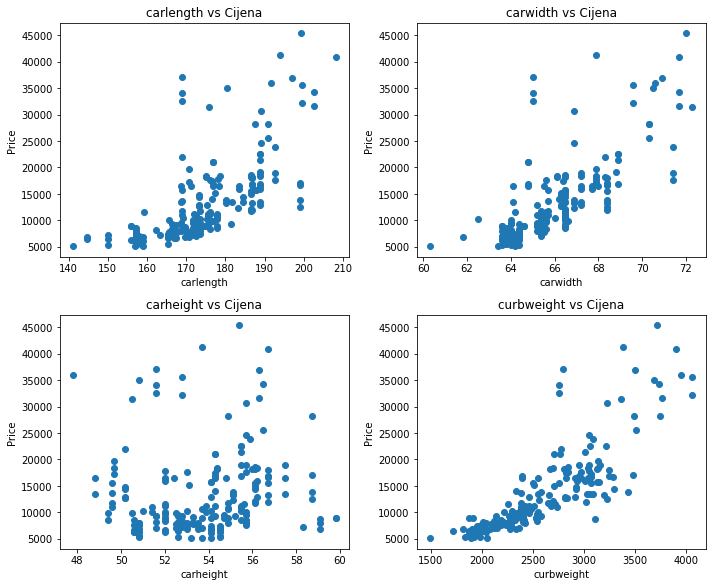

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Cijena')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

In [ ]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

#### Zaključak :

1. `carwidth`, `carlength` i `curbweight` imaju pozitivnu korelaciju `price`.
2. `carheight` ne pokazuje značajan trend s cijenom.
3. Korelacija koeficijenta sa širinom auta i duljinom je pozitivna i blizu 1

### Značajni parametri nakon vizualne analize:

    - Engine Type
    - Fuel type
    - Car Body
    - Aspiration
    - Drivewheel
    - Curbweight
    - Car Length
    - Car width
    - Horse Power

In [ ]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel',
                  'curbweight', 'enginetype','horsepower',
                     'carlength','carwidth']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,curbweight,enginetype,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,2548,dohc,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,2548,dohc,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,2823,ohcv,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,2337,ohc,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,2824,ohc,115,176.6,66.4


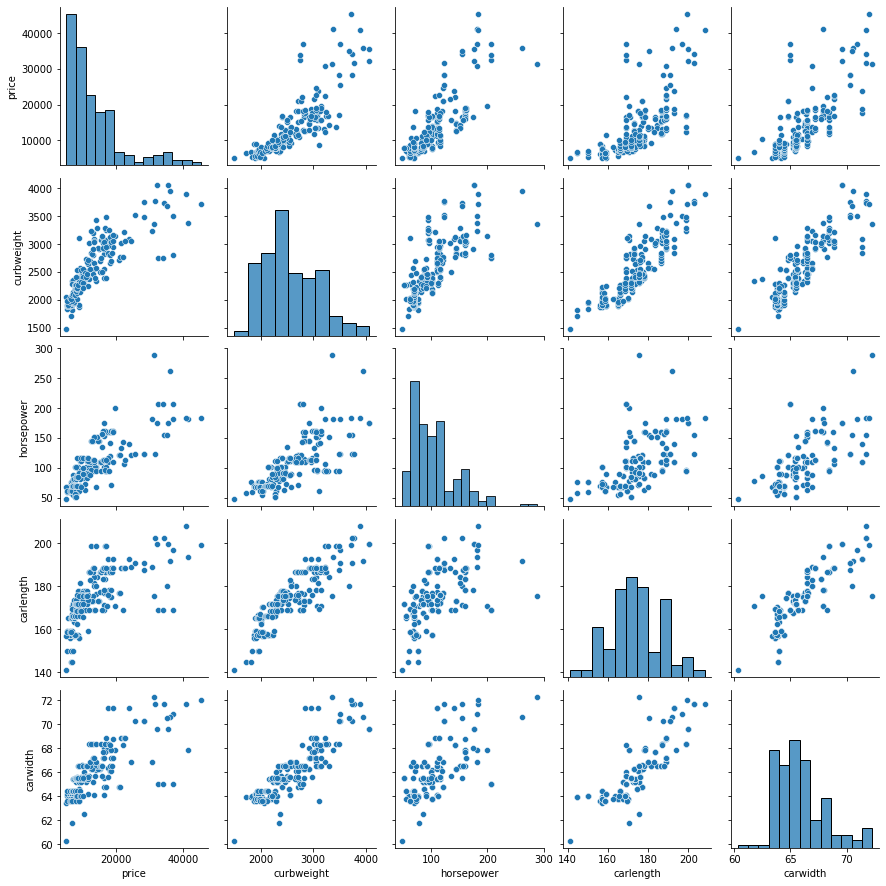

In [ ]:
sns.pairplot(cars_lr)
plt.show()

### Korak 4: Prebacivanje podataka iz kategoričkih u numeričke

In [ ]:
# Funkcija koja kategoričke varijable pretvara u numeričke
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)

In [ ]:
cars_lr.shape

(205, 19)

### Korak 5: Train-Test Split i skaliranje značajki

In [ ]:
from sklearn.model_selection import train_test_split

#np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['curbweight', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,price,curbweight,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
122,0.068818,0.272692,0.083333,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0
125,0.466890,0.500388,0.395833,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0
166,0.122110,0.314973,0.266667,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.411171,0.262500,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0
199,0.382131,0.647401,0.475000,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0


In [ ]:
df_train.describe()

,price,curbweight,horsepower,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.407878,0.227302,0.525476,0.461655,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972
std,0.215682,0.211269,0.165511,0.204848,0.184517,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.245539,0.091667,0.399187,0.304167,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.355702,0.191667,0.502439,0.425000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.313479,0.559542,0.283333,0.669919,0.550000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


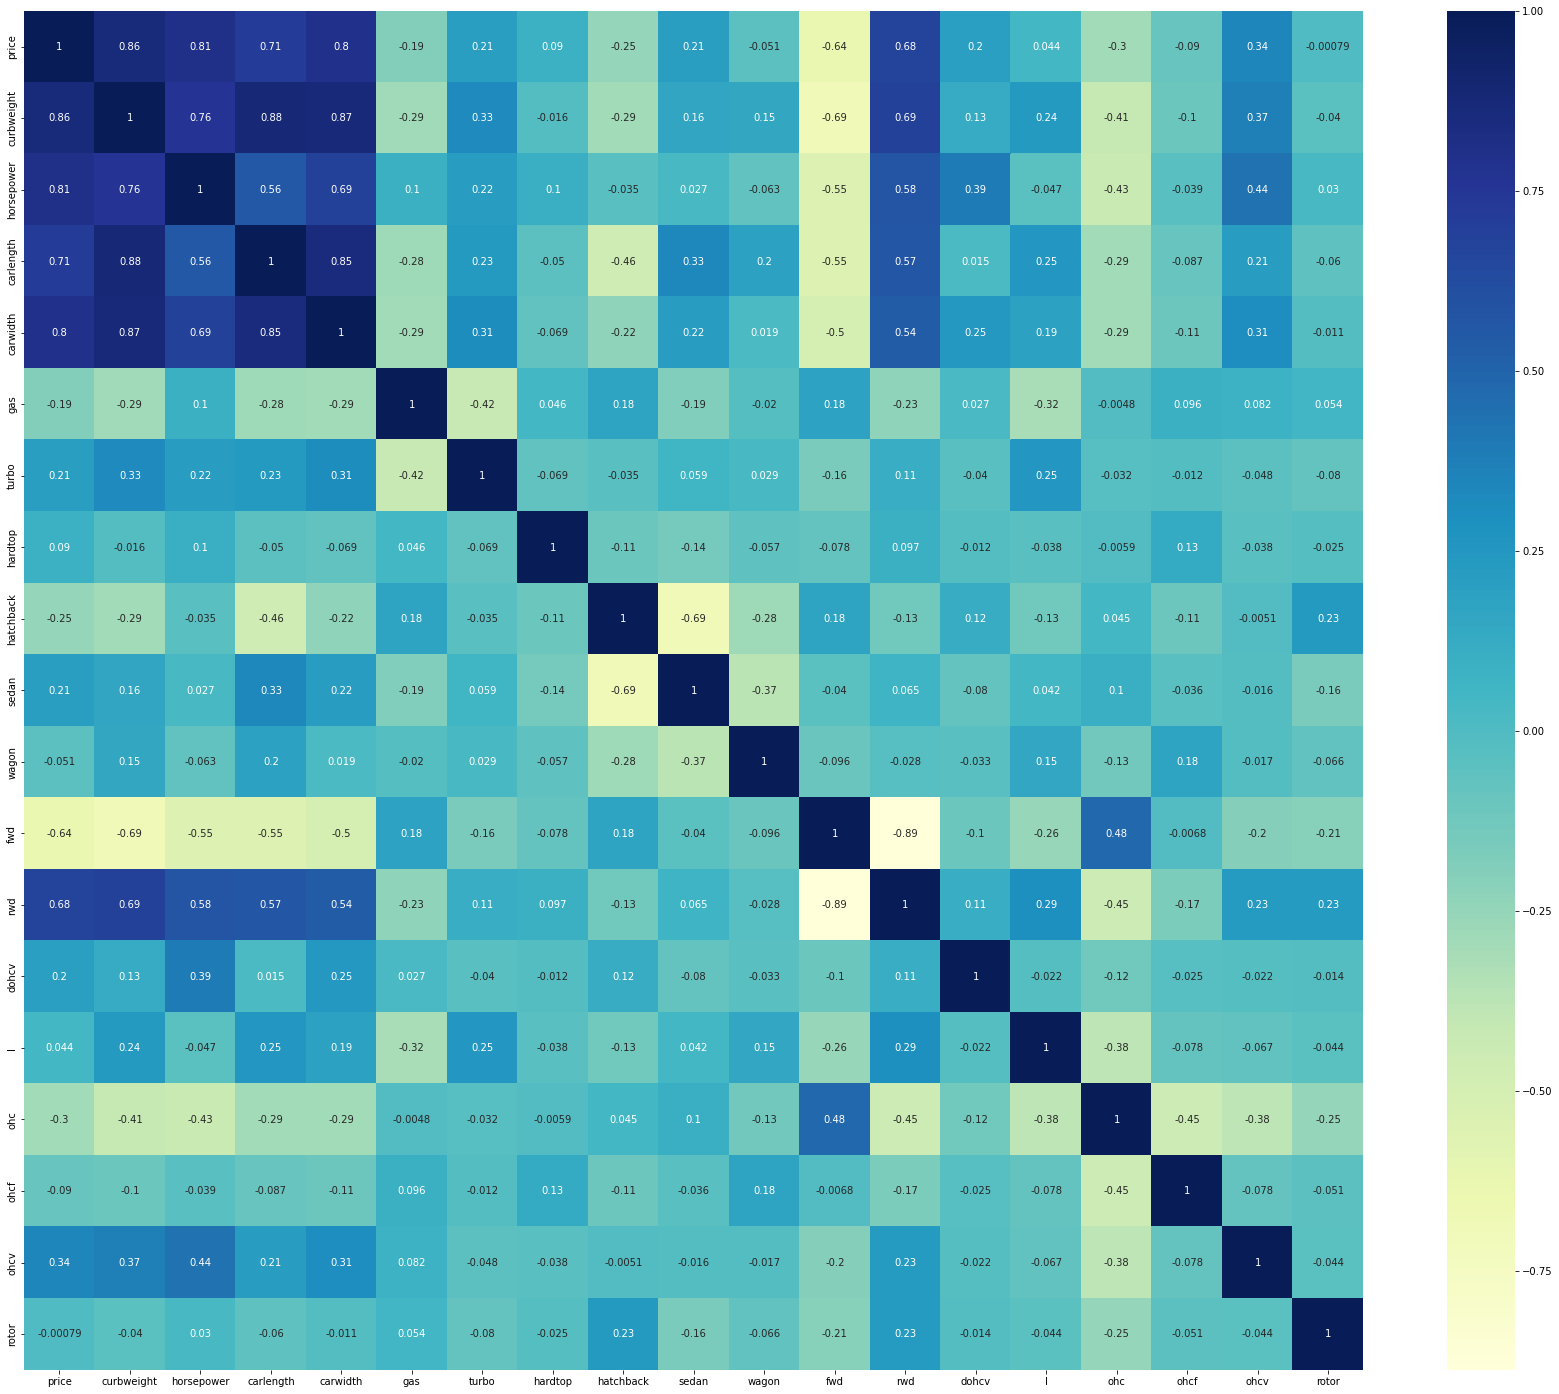

In [ ]:
#Korelacija preko Heatmape
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Visoko korelirane varijable sa cijenom su `curbweight`, `enginesize`, `horsepower`,`carwidth`.

### Korak 6: Predviđanje cijene

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import r2_score


In [ ]:
x=cars['price']
array=np.array(x)
y=cars['horsepower']

Coeff: 
 [0.0041723] 51.35214557028113
coeff of: 0.63


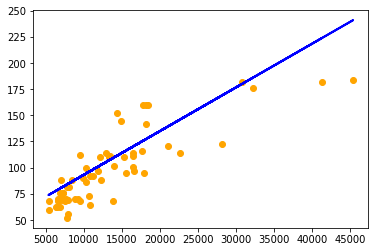

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(array.reshape(-1,1),y,test_size=0.3,random_state=47)
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

print("Coeff: \n",regr.coef_,regr.intercept_)
print("coeff of: %.2f" %r2_score(y_test,y_pred))
plt.scatter(x_test,y_test,color='orange')
plt.plot(x_test,y_pred,color="blue",linewidth=2)

plt.show()

In [ ]:
x=cars['price']
array=np.array(x)
y=cars['carlength']

Coeff: 
 [0.00103201] 160.2838092253048
coeff of: 0.57


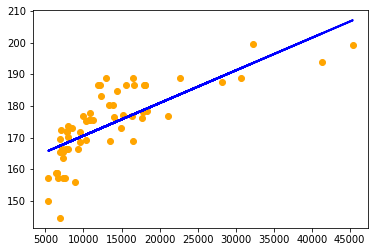

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(array.reshape(-1,1),y,test_size=0.3,random_state=47)
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

print("Coeff: \n",regr.coef_,regr.intercept_)
print("coeff of: %.2f" %r2_score(y_test,y_pred))
plt.scatter(x_test,y_test,color='orange')
plt.plot(x_test,y_pred,color="blue",linewidth=2)

plt.show()

### Zaključak

Nakon ove analize sa predviđanjima možemo zaključiti da su cijena i određeni parametri pozitivno korelirani te da oni direktno mogu utjecati na cijenu.
Najbolji primjer toga je horsepower te uz pomoć linearne regresije možemo pretpostaviti srednju vrijednost cijene sa konjskim snagama.